<a href="https://colab.research.google.com/github/Hbrand03/Intro_to_ML_Work/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

Accuracy: 0.7303
Precision: 0.6905
Recall: 0.7250
F1 Score: 0.7073


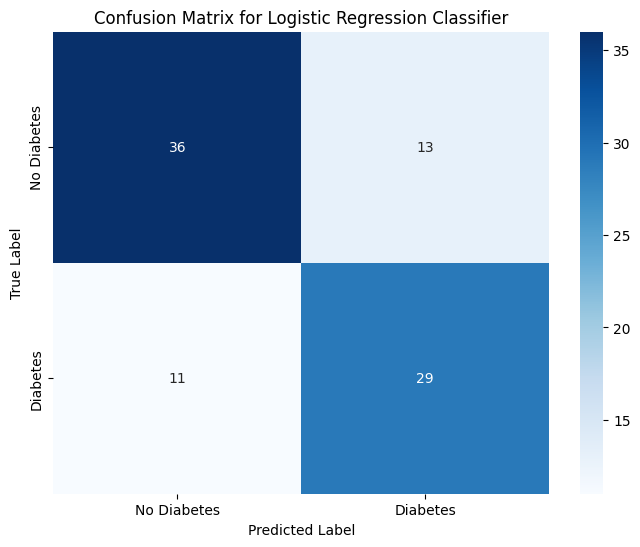

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
diabetes_data = load_diabetes()

# Convert regression target to binary (positive diabetes if target > median)
target_binary = (diabetes_data.target > np.median(diabetes_data.target)).astype(int)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.data, target_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Problem 2

Model without Penalty:
Accuracy: 0.9386
Precision: 0.9848
Recall: 0.9155
F1 Score: 0.9489

Model with Penalty (L2):
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790



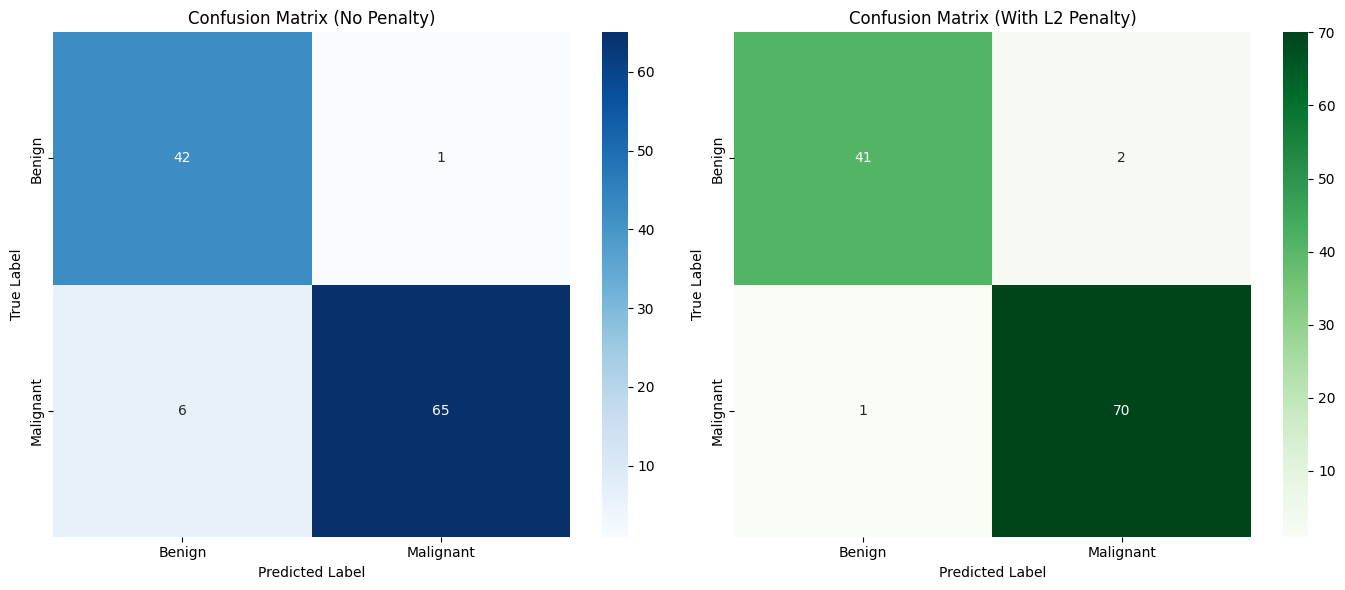

In [4]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model without penalty
model_no_penalty = LogisticRegression(max_iter=500, penalty=None)
model_no_penalty.fit(X_train, y_train)

# Predictions and evaluation metrics (no penalty)
y_pred_no_penalty = model_no_penalty.predict(X_test)
accuracy_no_penalty = accuracy_score(y_test, y_pred_no_penalty)
precision_no_penalty = precision_score(y_test, y_pred_no_penalty)
recall_no_penalty = recall_score(y_test, y_pred_no_penalty)
f1_no_penalty = f1_score(y_test, y_pred_no_penalty)
conf_matrix_no_penalty = confusion_matrix(y_test, y_pred_no_penalty)

# Initialize and train the logistic regression model with weight penalty (L2)
model_with_penalty = LogisticRegression(max_iter=500, penalty='l2', C=1.0)
model_with_penalty.fit(X_train, y_train)

# Predictions and evaluation metrics (with penalty)
y_pred_with_penalty = model_with_penalty.predict(X_test)
accuracy_with_penalty = accuracy_score(y_test, y_pred_with_penalty)
precision_with_penalty = precision_score(y_test, y_pred_with_penalty)
recall_with_penalty = recall_score(y_test, y_pred_with_penalty)
f1_with_penalty = f1_score(y_test, y_pred_with_penalty)
conf_matrix_with_penalty = confusion_matrix(y_test, y_pred_with_penalty)

# Print metrics for both models
print("Model without Penalty:")
print(f"Accuracy: {accuracy_no_penalty:.4f}")
print(f"Precision: {precision_no_penalty:.4f}")
print(f"Recall: {recall_no_penalty:.4f}")
print(f"F1 Score: {f1_no_penalty:.4f}\n")

print("Model with Penalty (L2):")
print(f"Accuracy: {accuracy_with_penalty:.4f}")
print(f"Precision: {precision_with_penalty:.4f}")
print(f"Recall: {recall_with_penalty:.4f}")
print(f"F1 Score: {f1_with_penalty:.4f}\n")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(conf_matrix_no_penalty, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[0].set_title('Confusion Matrix (No Penalty)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_with_penalty, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[1].set_title('Confusion Matrix (With L2 Penalty)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


Problem 3

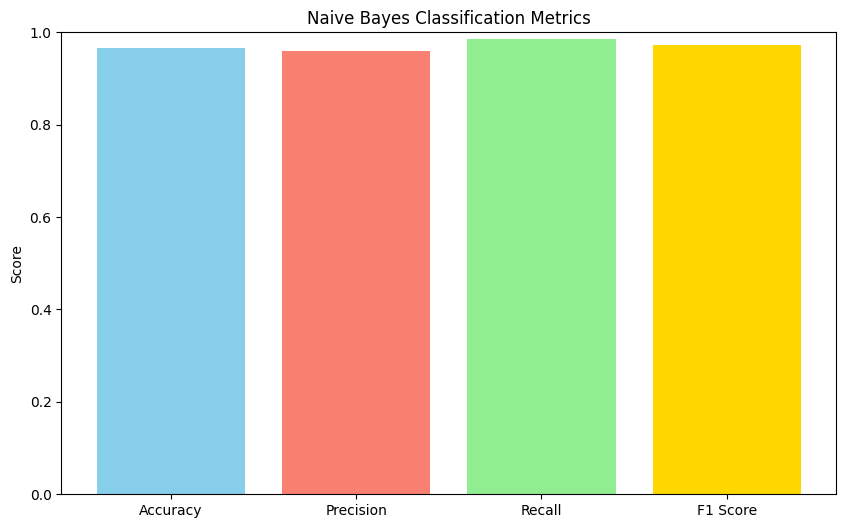

Naive Bayes Model Metrics:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722


In [5]:
# Import necessary libraries for Naive Bayes
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions and evaluation metrics
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Store the results in a dictionary for easier comparison
nb_results = {
    "Accuracy": accuracy_nb,
    "Precision": precision_nb,
    "Recall": recall_nb,
    "F1 Score": f1_nb
}

# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_nb, precision_nb, recall_nb, f1_nb]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.ylim(0, 1)
plt.title('Naive Bayes Classification Metrics')
plt.ylabel('Score')
plt.show()

# Print the results for Naive Bayes model
print("Naive Bayes Model Metrics:")
for metric, value in nb_results.items():
    print(f"{metric}: {value:.4f}")


Problem 4

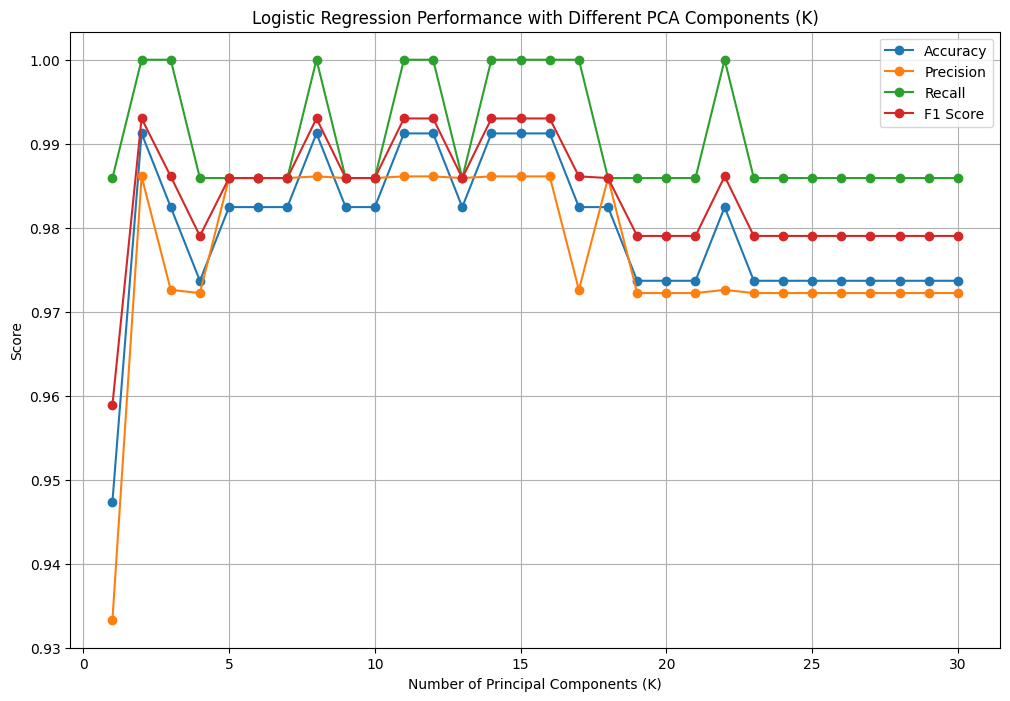

Optimal number of K (principal components): 2
Highest classification accuracy: 0.9912


In [6]:
# Import necessary libraries for PCA and Logistic Regression
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store results for each K
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define the range for K (number of principal components)
K_range = range(1, 31)  # Since there are 30 features in the cancer dataset

# Iterate over each K and perform Logistic Regression
for K in K_range:
    # Apply PCA with K components
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train Logistic Regression on the PCA-transformed data
    model = LogisticRegression(max_iter=500)
    model.fit(X_train_pca, y_train)

    # Predict and calculate evaluation metrics
    y_pred = model.predict(X_test_pca)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Identify the K that achieved the highest accuracy
optimal_K = K_range[accuracy_scores.index(max(accuracy_scores))]
optimal_accuracy = max(accuracy_scores)

# Plot the metrics over different values of K
plt.figure(figsize=(12, 8))
plt.plot(K_range, accuracy_scores, label="Accuracy", marker='o')
plt.plot(K_range, precision_scores, label="Precision", marker='o')
plt.plot(K_range, recall_scores, label="Recall", marker='o')
plt.plot(K_range, f1_scores, label="F1 Score", marker='o')
plt.title("Logistic Regression Performance with Different PCA Components (K)")
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal K and corresponding accuracy
print(f"Optimal number of K (principal components): {optimal_K}")
print(f"Highest classification accuracy: {optimal_accuracy:.4f}")


Problem 5

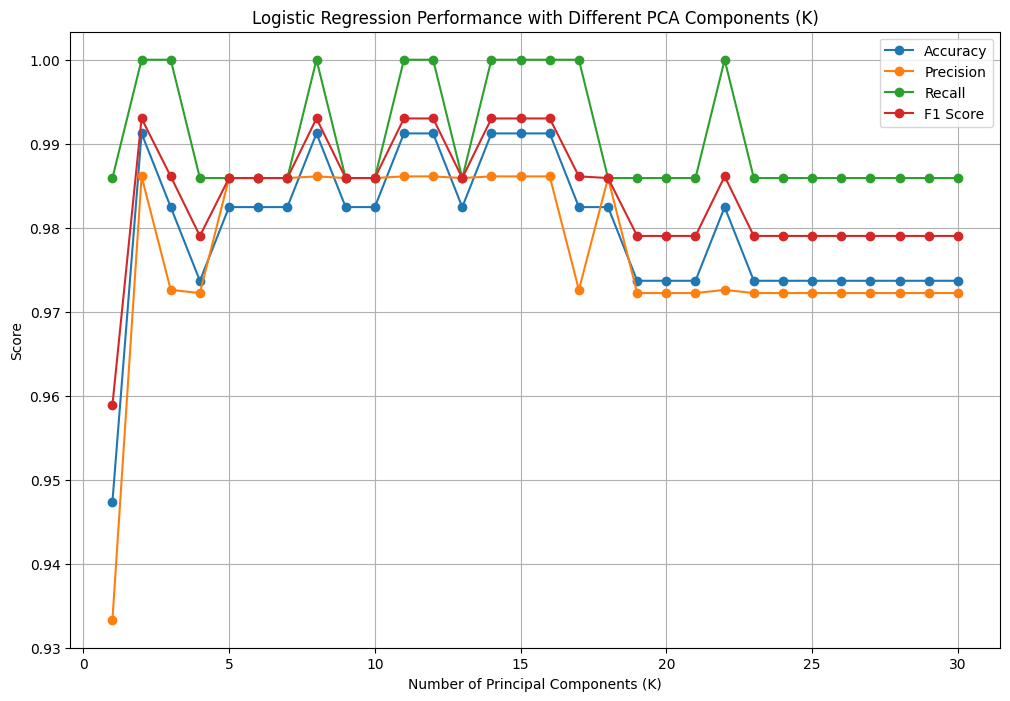

Optimal number of K (principal components): 2
Highest classification accuracy: 0.9912


In [7]:
# Import necessary libraries for PCA and Logistic Regression
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store results for each K
accuracy_scores_lr = []
precision_scores_lr = []
recall_scores_lr = []
f1_scores_lr = []

# Define the range for K (number of principal components)
K_range = range(1, 31)  # Since there are 30 features in the cancer dataset

# Iterate over each K and perform Logistic Regression
for K in K_range:
    # Apply PCA with K components
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train Logistic Regression on the PCA-transformed data
    model_lr = LogisticRegression(max_iter=500)
    model_lr.fit(X_train_pca, y_train)

    # Predict and calculate evaluation metrics
    y_pred_lr = model_lr.predict(X_test_pca)
    accuracy_scores_lr.append(accuracy_score(y_test, y_pred_lr))
    precision_scores_lr.append(precision_score(y_test, y_pred_lr))
    recall_scores_lr.append(recall_score(y_test, y_pred_lr))
    f1_scores_lr.append(f1_score(y_test, y_pred_lr))

# Identify the K that achieved the highest accuracy
optimal_K_lr = K_range[accuracy_scores_lr.index(max(accuracy_scores_lr))]
optimal_accuracy_lr = max(accuracy_scores_lr)

# Plot the metrics over different values of K
plt.figure(figsize=(12, 8))
plt.plot(K_range, accuracy_scores_lr, label="Accuracy", marker='o')
plt.plot(K_range, precision_scores_lr, label="Precision", marker='o')
plt.plot(K_range, recall_scores_lr, label="Recall", marker='o')
plt.plot(K_range, f1_scores_lr, label="F1 Score", marker='o')
plt.title("Logistic Regression Performance with Different PCA Components (K)")
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal K and corresponding accuracy
print(f"Optimal number of K (principal components): {optimal_K_lr}")
print(f"Highest classification accuracy: {optimal_accuracy_lr:.4f}")
